In [233]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [234]:
def model(t, X, param):
    Dc, Mc, Mn = X
    lambda_ =param["lambda"]
    d0 =param["d0"]
    d1 =param["d1"]
    d2 =param["d2"]
    k1 =param["k1"]
    k2 =param["k2"]
    a = param["a"]
    f = param["f"]
    d = param["d"]

    s = a*np.sin(2*np.pi*f*t)+d

    dDc_dt = lambda_-d0*Dc+0.5*k1*Mc**2-s*Dc
    dMc_dt = -k1*Mc**2-k2*Mc-d2*Mc+2*s*Dc
    dMn_dt = -d1*Mn+k2*Mc

    return np.array([dDc_dt, dMc_dt, dMn_dt])

In [235]:
param = {
    "lambda": 15,
    "d0": 0.1,
    "d1": 1,
    "d2": 0.5,
    "k1": 50,
    "k2": 5,
    "a": 10,  # Amplitude de s(t)
    "f": 0.1,  # Frequence de s(t)
    "d": 10.1,  # Decallage pour que s(t) soit positive
}

initial_conditions = np.array([50, 0, 0])  # [Dc0, Mc0, Mn0]

t_span = (0, 100) # Temps de 0 a 100
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 points 

In [236]:
# Resoudre l ODE
solution = solve_ivp(model, t_span, y0=initial_conditions, method="RK45", t_eval=t_eval, args=(param,))

t = solution.t
Dc, Mc, Mn = solution.y

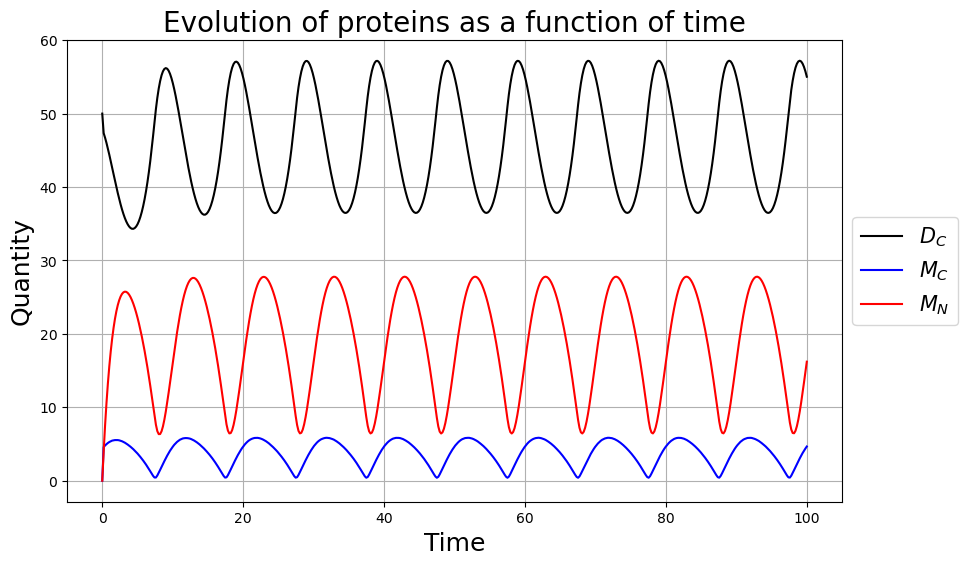

In [237]:
plt.figure(figsize=(10, 6))
plt.plot(t, Dc, 'k', label="$D_C$")
plt.plot(t, Mc, 'b', label="$M_C$")
plt.plot(t, Mn, 'r', label="$M_N$")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Quantity", fontsize=18)
plt.title("Evolution of proteins as a function of time", fontsize=20)
plt.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()

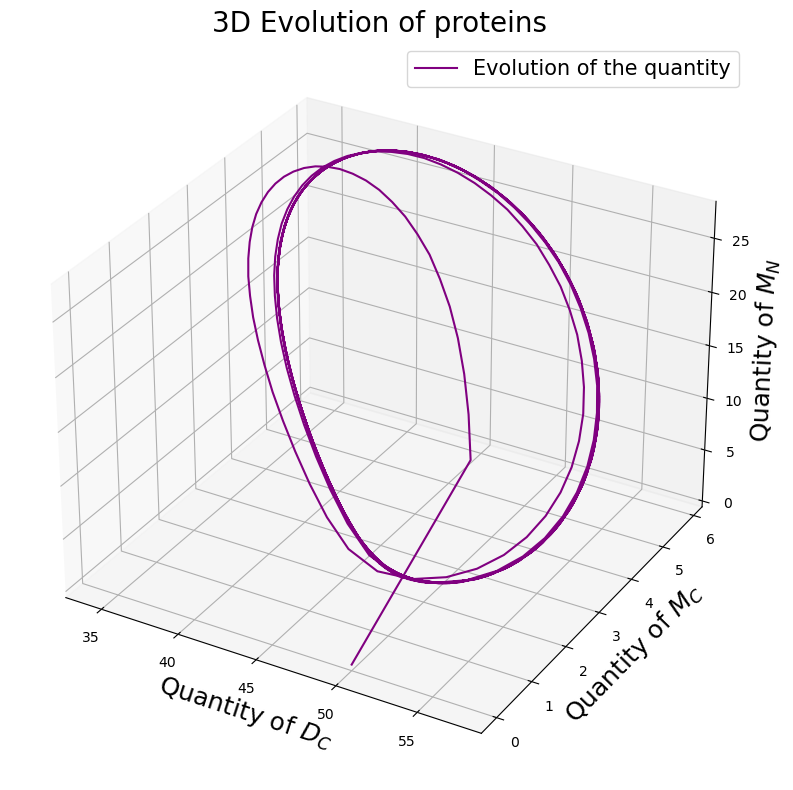

In [238]:
# Création de la figure 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé 3D : chaque variable sur un axe
ax.plot(Dc, Mc, Mn, label="Evolution of the quantity", color='purple')

# Axes et personnalisation
ax.set_xlabel("Quantity of $D_C$", fontsize=18)
ax.set_ylabel("Quantity of $M_C$", fontsize=18)
ax.set_zlabel("Quantity of $M_N$", fontsize=18)
ax.set_title("3D Evolution of proteins", fontsize=20)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()

In [239]:
amplitudes = np.linspace(0, 10, 6)  # Amplitudes de 0 à 10. Attention à bien garder la positivité de s
colors = plt.cm.cividis(np.linspace(0, 1, len(amplitudes))) 

In [240]:
def plot_3d_variable_amplitude(variable, label, zlabel, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, a in enumerate(amplitudes):
        param["a"] = a
        sol = solve_ivp(model, t_span, y0=initial_conditions, method="RK45", t_eval=t_eval, args=(param,))
        
        var = sol.y[variable]
        ax.plot(t_eval, [a] * len(t_eval), var, label=f'a={a:.1f}', color=colors[i])

    ax.set_xlabel("Time", fontsize=18)
    ax.set_ylabel("Amplitude", fontsize=18)
    ax.set_zlabel(zlabel, fontsize=18)
    ax.set_title(title, fontsize=20)
    ax.legend(fontsize=15, bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

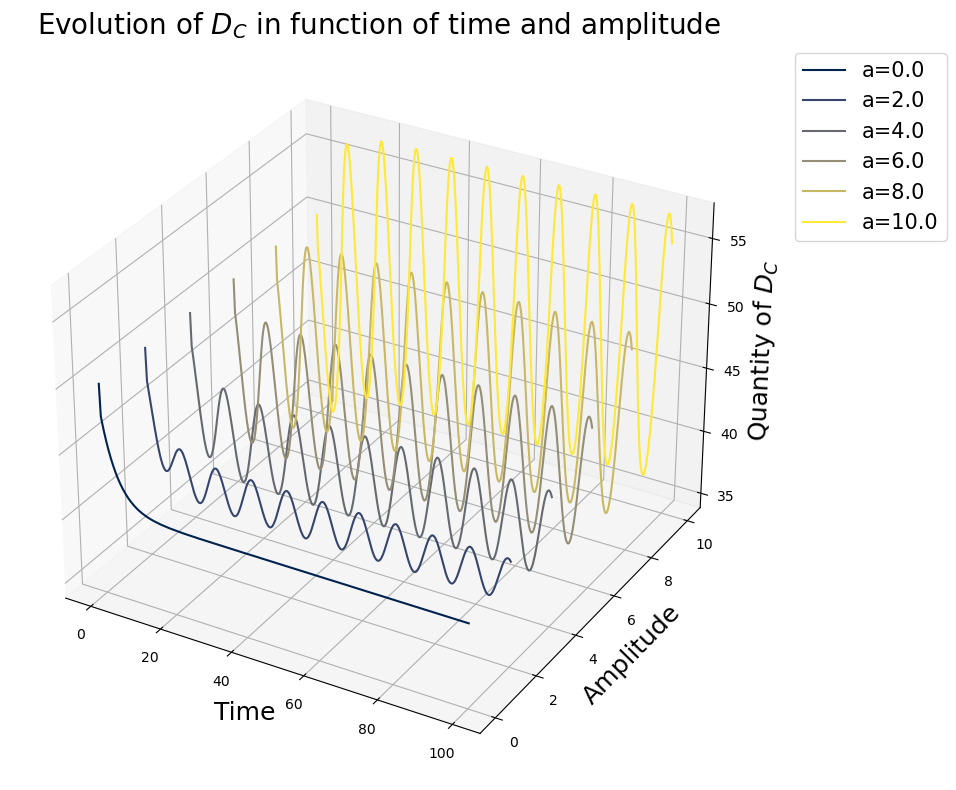

In [241]:
plot_3d_variable_amplitude(0, "$D_C$", "Quantity of $D_C$", "Evolution of $D_C$ in function of time and amplitude")

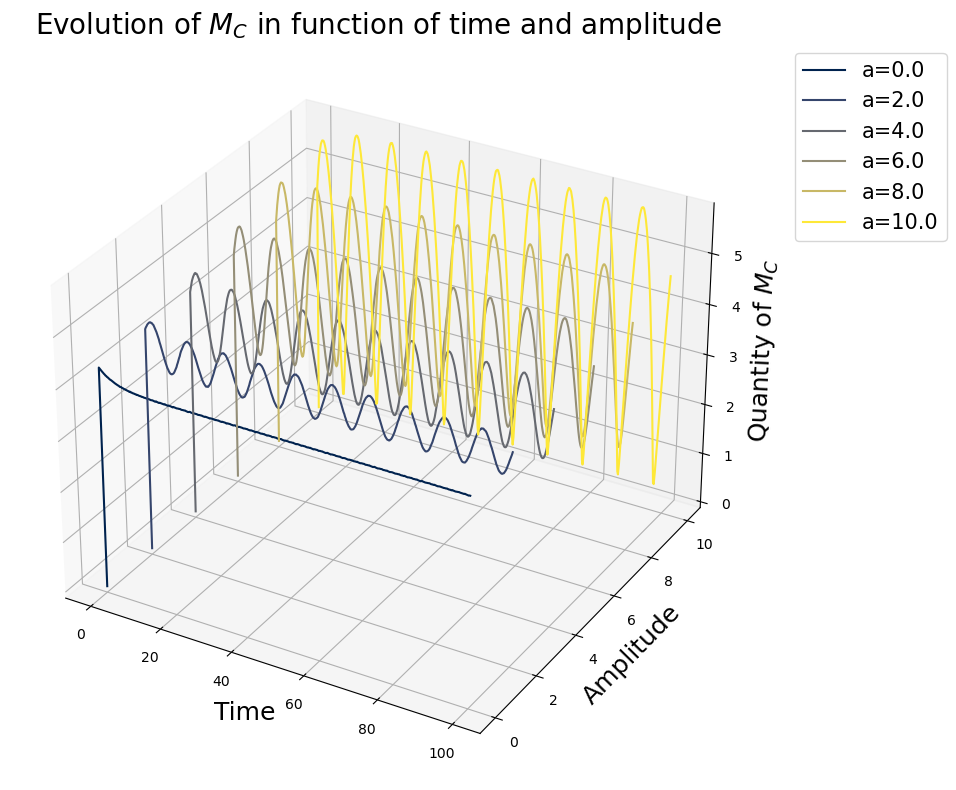

In [242]:
plot_3d_variable_amplitude(1, "$M_C$", "Quantity of $M_C$", "Evolution of $M_C$ in function of time and amplitude")

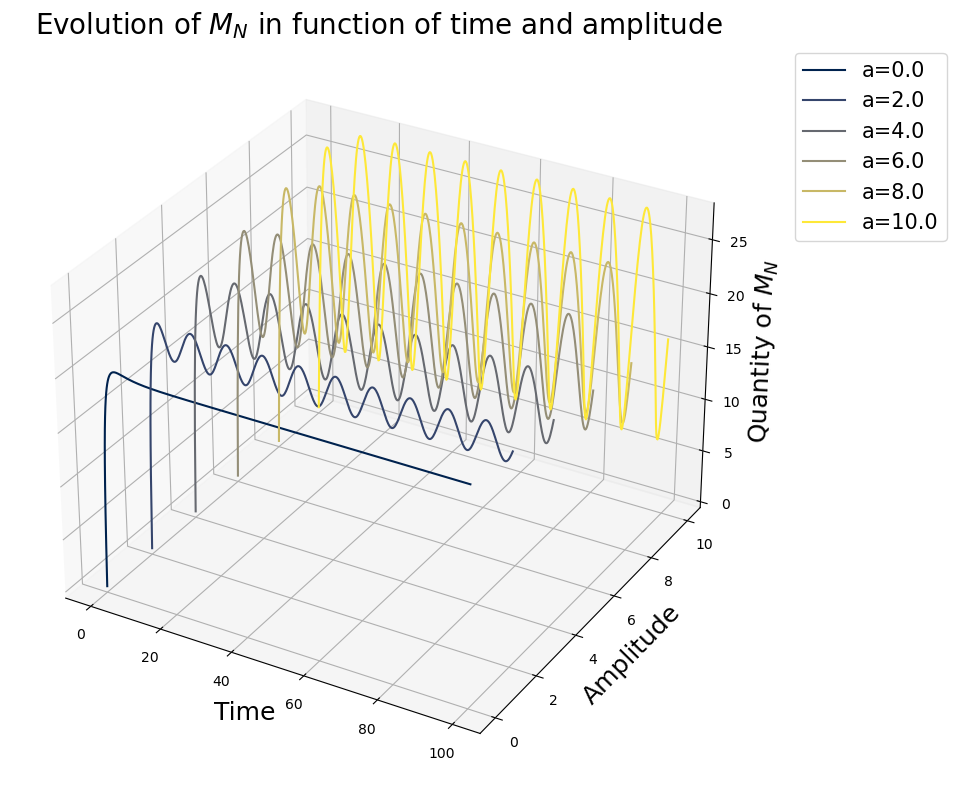

In [243]:
plot_3d_variable_amplitude(2, "$M_N$", "Quantity of $M_N$", "Evolution of $M_N$ in function of time and amplitude")

In [244]:
frequences = np.linspace(0, 1, 6)  # Frequences de 0 à 1
param["a"] = 10
colors = plt.cm.cividis(np.linspace(0, 1, len(frequences)))

In [245]:
def plot_3d_frequences(variables, label, zlabel, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, f in enumerate(frequences):
        param["f"] = f
        sol = solve_ivp(model, t_span, y0=initial_conditions, method="RK45", t_eval=t_eval, args=(param,))
        
        variable = sol.y[variables]
        ax.plot(t_eval, [f] * len(t_eval), variable, label=f'f={f:.1f}', color=colors[i])

    ax.set_xlabel("Time", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    ax.set_zlabel(zlabel, fontsize=18)
    ax.set_title(title, fontsize=20)
    ax.legend(fontsize=15, bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()

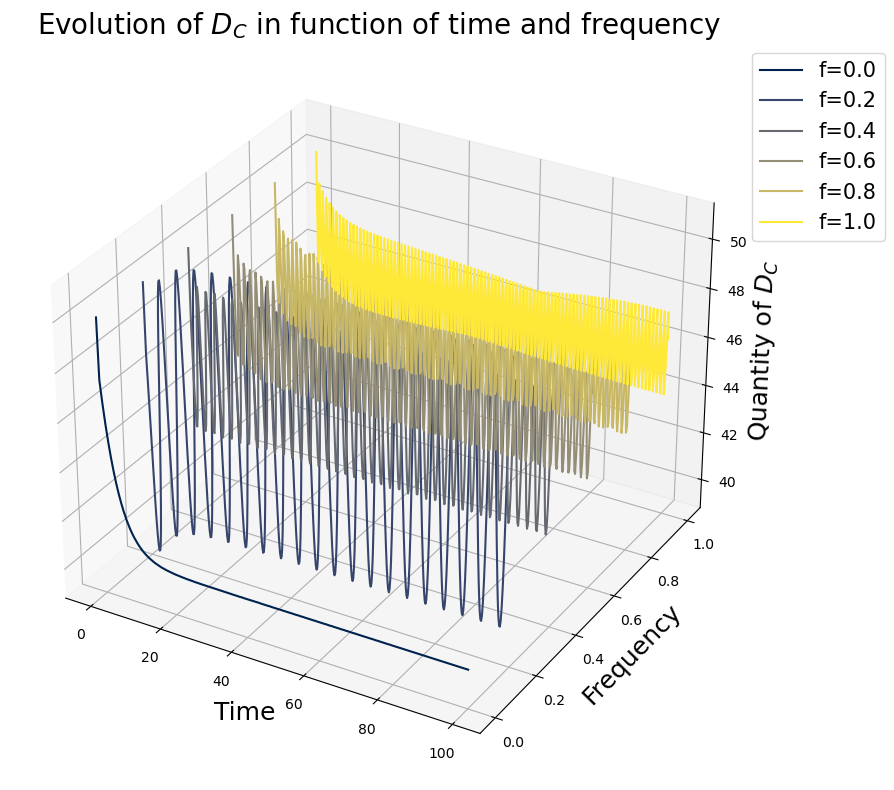

In [246]:
plot_3d_frequences(0, "$D_C$", "Quantity of $D_C$", "Evolution of $D_C$ in function of time and frequency")

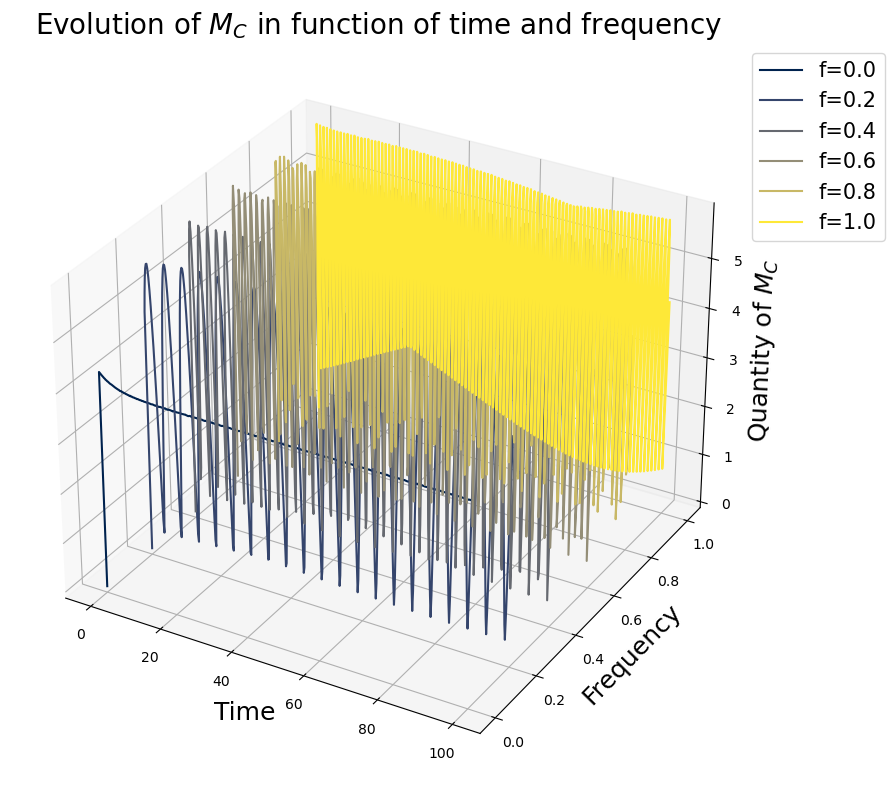

In [247]:
plot_3d_frequences(1, "$M_C$", "Quantity of $M_C$", "Evolution of $M_C$ in function of time and frequency")

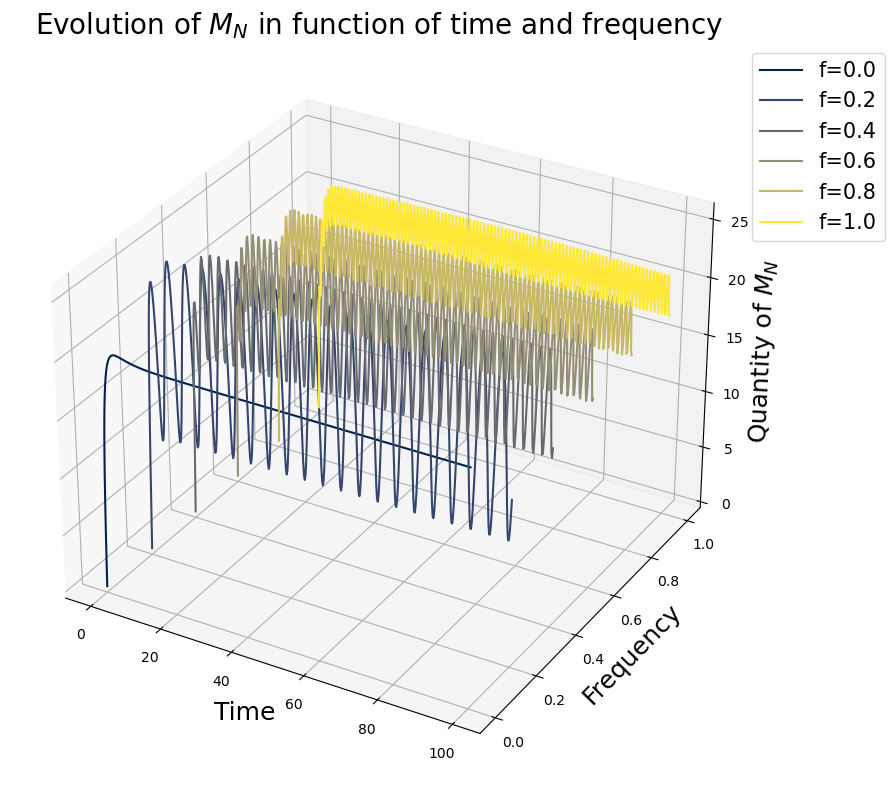

In [248]:
plot_3d_frequences(2, "$M_N$", "Quantity of $M_N$", "Evolution of $M_N$ in function of time and frequency")